Pre-entrega 1 Sposetti

Para este pre-entrega decidi utilizar un dataset de transacciones financieras con posible riesgo de lavado de dinero.
Viendo un poco de dataset, la hipotesis que me planteo es si el monto de los transacciones esta relacionado de alguna manera con el puntaje de riesgo de lavado.
Para responder a esto realizare un analisis de los datos que muestra el dataset, y mostrare en graficos las relaciones entre las principales variables del mismo.

In [ ]:
# --- Análisis de Dataset: Transacciones financieras con riesgo de lavado de dinero ---
# Importo las Bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# --- Análisis Exploratorio de Datos ---

# Creo el DataFrame
# URL del archivo CSV en formato raw
url = 'https://raw.githubusercontent.com/FrancoSposetti/pre-entrega1-sposetti/main/Big_Black_Money_Dataset.csv'

# Cargar el dataset en un DataFrame
data = pd.read_csv(url)

# Mostrar las primeras filas para comprobar la carga
data.head()

,Index,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,1,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,2,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,3,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,4,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,5,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [ ]:
#  --- Limpieza de Datos ---

print("\n Tamaño del dataset antes de la limpieza de datos :")
print(data.shape)

# Cambio el nombre de las columnas
data = data.rename(columns={
    "Index":"Indice",
    "Transaction ID": "Transaccion ID",
    "Country": "Pais",
    "Amount (USD)": "Monto",
    "Transaction Type": "Tipo de transaccion",
    "Date of Transaction": "Fecha",
    "Person Involved": "Persona involucrada",
    "Industry": "Industria",
    "Destination Country": "Pais destino",
    "Reported by Authority": "Declarado",
    "Source of Money": "Fuente del dinero",
    "Money Laundering Risk Score": "Riesgo de lavado",
    "Shell Companies Involved": "Empresa involucrada",
    "Financial Institution": "Institucion financiera",
    "Tax Haven Country": "Paraiso fiscal"
})

# Selecciono variables relevantes
data = data.drop(columns=["Indice","Persona involucrada","Empresa involucrada","Institucion financiera"])

# Convierto la columna fecha en Datetime
data["Fecha"] = pd.to_datetime(data["Fecha"], errors="coerce")

# Normalizo los montos
data["Monto"] = (data["Monto"] / 100).astype(int)

print("Tamaño del dataset despues de la limpieza de datos")
print(data.shape)



 Tamaño del dataset antes de la limpieza de datos :
(10000, 15)
Tamaño del dataset despues de la limpieza de datos
(10000, 11)


Realizo una limpieza de datos, primero cambio los nombres de las columnas para poder trabajar mas comodo. Cambio al tipo date la columna de fecha para trabajar de manera correcta y ademas modifique el monto por ser tamños muy grandes y al dividir por 100 los montos mantienen su proporcion para poder trabajar mejor.

In [ ]:
# -- Exploración Inicial del Dataset --
print("Primeras filas del dataset:")
print(data.head())

print("\n Información del Dataset:")
print(data.info())

print("\n Tamaño del dataset:")
print(data.shape)

print("\n Valores nulos del dataset:")
print(data.isnull().sum())

print("\n Resumen Estadístico de las variables numéricas:")
print(data.drop(columns="Fecha").describe())

Primeras filas del dataset:
  Transaccion ID          Pais  Monto Tipo de transaccion               Fecha  \
0   TX0000000001        Brazil  32675   Offshore Transfer 2013-01-01 00:00:00   
1   TX0000000002         China  49657     Stocks Transfer 2013-01-01 01:00:00   
2   TX0000000003            UK    941     Stocks Transfer 2013-01-01 02:00:00   
3   TX0000000004           UAE   3864     Cash Withdrawal 2013-01-01 03:00:00   
4   TX0000000005  South Africa   6433      Cryptocurrency 2013-01-01 04:00:00   

      Industria  Pais destino  Declarado Fuente del dinero  Riesgo de lavado  \
0  Construction           USA       True           Illegal                 6   
1  Luxury Goods  South Africa      False           Illegal                 9   
2  Construction   Switzerland       True           Illegal                 1   
3     Oil & Gas        Russia      False           Illegal                 7   
4   Real Estate           USA       True           Illegal                 1   

  Pa

Realizo la exploracion incial de los datos donde se pueden ver algunos aspectos del dataset. Cuenta con 11 columnas y 10000 mil resgistros en las cuales no se observan valores nulos o valores faltantes.
Ademas con el describe se pueden ver las primeras caracterizticas de las dos principales variables numericas, el monto de las transacciones y el puntaje de riesgo de lavado de dinero. Por el lado del Monto, se puede ver que el promerio es de 25017.67 con una desviacion estandar de la media de 14243,65 lo que en un primer punto nos indica que los datos estan bastante dispersos teniendo en cuenta los maximos y los minimos. Mientras que por el lado del puntaje de riesgo, nos muestra un promedio de 5,52 y una desviacion estandar de 2,89 lo que al igual que los montos nos muestra lo bastante dispersos que estan los datos.


In [ ]:
# --- Exploración del Dataset ---
print("\n Monto por país")
monto_pais = data.groupby("Pais")["Monto"].sum().reset_index()
monto_pais_ordenado = monto_pais.sort_values(by="Monto", ascending=False)
print(monto_pais_ordenado)

print("\n Monto por tipo de Transacción")
monto_transaccion = data.groupby("Tipo de transaccion")["Monto"].sum().reset_index()
monto_transaccion_oordenado = monto_transaccion.sort_values(by="Monto", ascending=False)
print(monto_transaccion_oordenado)

print("\n Monto por industria")
monto_industria = data.groupby("Industria")["Monto"].sum().reset_index()
monto_industria_ordenado = monto_industria.sort_values(by="Monto", ascending=False)
print(monto_industria_ordenado)

print("\n Monto por País destino")
monto_Destino = data.groupby("Pais destino")["Monto"].sum().reset_index()
monto_Destino_ordenado = monto_Destino.sort_values(by="Monto", ascending=False)
print(monto_Destino_ordenado)

print("\n Monto por paraíso fiscal")
monto_paraiso = data.groupby("Paraiso fiscal")["Monto"].sum().reset_index()
monto_paraiso_ordenado = monto_paraiso.sort_values(by="Monto", ascending=False)
print(monto_paraiso_ordenado)

print("\n Descripción del riesgo ")
print(data["Riesgo de lavado"].describe())
print(data.groupby("Riesgo de lavado")["Monto"].count())

print("\n Origen del dinero ")
print(data.groupby("Fuente del dinero")["Monto"].count())

print("\n Declarado o no")
print(data.groupby("Declarado")["Monto"].count())


 Monto por país
           Pais     Monto
1         China  26916175
5  South Africa  25760603
8            UK  25276702
0        Brazil  25133104
4     Singapore  24957971
3        Russia  24940957
6   Switzerland  24792627
2         India  24676036
7           UAE  24302396
9           USA  23420205

 Monto por tipo de Transacción
  Tipo de transaccion     Monto
3   Property Purchase  51117126
2   Offshore Transfer  50047337
1      Cryptocurrency  49740903
4     Stocks Transfer  49673048
0     Cash Withdrawal  49598362

 Monto por industria
      Industria     Monto
3       Finance  37358506
2  Construction  37056661
0    Arms Trade  36004861
4  Luxury Goods  35978194
6   Real Estate  35758618
1       Casinos  34184040
5     Oil & Gas  33835896

 Monto por País destino
   Pais destino     Monto
9           USA  26176470
3        Russia  25567194
4     Singapore  25512313
2         India  25509623
6   Switzerland  25305743
5  South Africa  25127466
8            UK  24688995
1         

Luego de realizar una primera exploracion de los datos, realizo una exploracion un poco mas profunda de los mismos. Hice analisis de de monto por pais, monto por industria, monto por tipo de transaccion, monto por pais de destino, monto por paraiso fiscal, para ver la distribucion de los montos en estas clasificaciones y si existia una preferencia en el modo de operar. Si bien se pueden ver que algunos datos existe cierta importancia con respecto a otros, no llegan a ser concluyentes a simple vista, por ejemplo: el pais donde mas se realizan las trasacciiones es China pero no existe una diferencia significativa con respecto a los demas paises, asi mismo ocurre con los montos por trasacciones o con el tipo de industria.
Donde se puede ver diferencia en la distribucion de los datos es en las columnas de Declarado y de Fuente del dinero, donde se puede observar que un 70% del dinero utilzado para las transacciones fue de origen Ilegal y que casi un 80% de las operaciones fue No declarado.




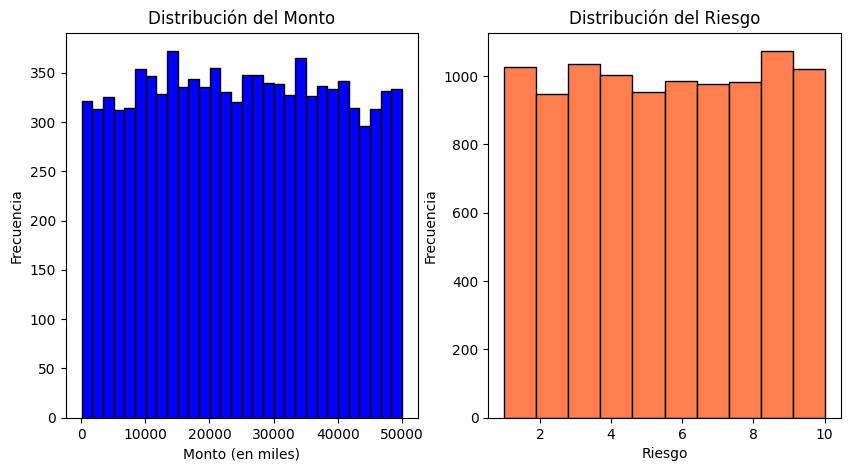

In [ ]:
# --- Primeras Visualizaciones ---
# --- Gráficos con Matplotlib ---

# 1) Gráficos univariados: Histograma de monto y riesgo de lavado
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Gráfico de monto
monto_count = data["Monto"]
monto_count.plot(kind="hist", color="blue", bins=30, edgecolor="black", ax=ax1)
ax1.set_title("Distribución del Monto")
ax1.set_xlabel("Monto (en miles)")
ax1.set_ylabel("Frecuencia")
# Gráfico de riesgo
riesgo_count = data["Riesgo de lavado"]
riesgo_count.plot(kind="hist", color="coral", edgecolor="black", ax=ax2)
ax2.set_title("Distribución del Riesgo")
ax2.set_xlabel("Riesgo")
ax2.set_ylabel("Frecuencia")
plt.show()


La primera vizulizacion se trata de dos graficos que la distribucion de los montos y los puntajes de riesgos para ver su frecuencia.
Se puede ver que tanto los montos como los riesgos tiene una distribucion bastante dispersa.

<ipython-input-17-97812e8c8907>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_riesgo = data.groupby("Monto por Quartil")["Riesgo de lavado"].mean().reset_index()


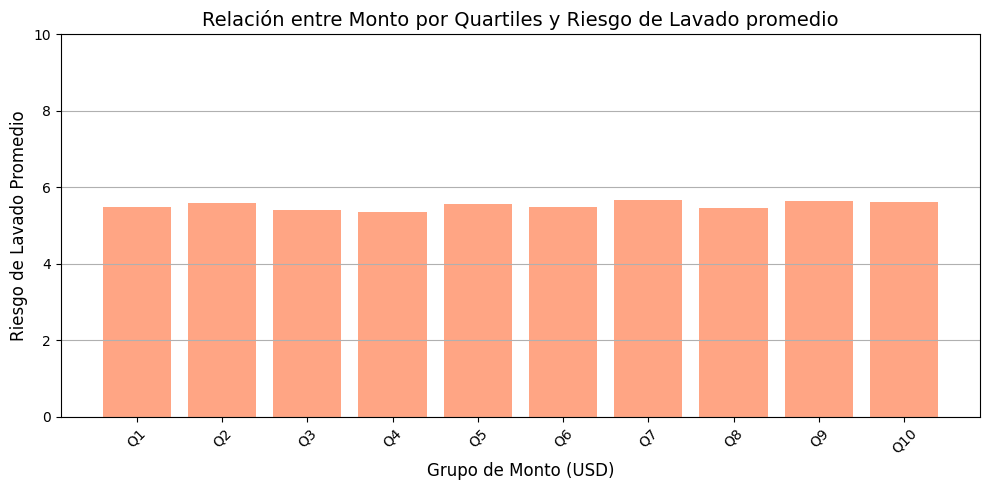

In [ ]:
# 2) Gráfico bivariado: Relación entre el monto de la transacción y el riesgo de lavado por quartiles
# Agrupo el monto en 10 quartiles
data["Monto por Quartil"] = pd.qcut(data["Monto"], q=10, labels=["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"])
# Calculo el promedio de riesgos
promedio_riesgo = data.groupby("Monto por Quartil")["Riesgo de lavado"].mean().reset_index()
# Creo el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(promedio_riesgo["Monto por Quartil"], promedio_riesgo["Riesgo de lavado"], alpha=0.7, color="coral")
# Títulos y etiquetas
plt.title('Relación entre Monto por Quartiles y Riesgo de Lavado promedio', fontsize=14)
plt.xlabel('Grupo de Monto (USD)', fontsize=12)
plt.ylabel('Riesgo de Lavado Promedio', fontsize=12)
# Ajustar tamaño de los ticks en el eje x
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
# Limitar el rango del eje y
plt.ylim(0, 10)
# Mostrar gráfico
plt.grid(axis='y')  # Mostrar la cuadrícula solo en el eje y
plt.tight_layout()  # Ajustar el layout para evitar recortes
plt.show()


En este segundo grafico, se muestran todos las transacciones divididas en 10 quartiles y el promedio de los puntajes de riesgos de estos 10 quartiles. Si bien se puede ver que algunos tienen mas promedio que otros, los 10 quartiles tiene un promedio muy similar, todos alrededor de 5.50.

<Figure size 1400x600 with 0 Axes>

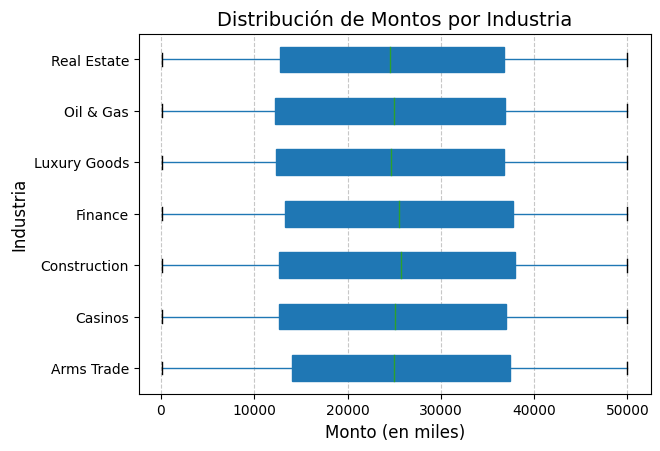

In [ ]:
# --- Gráfico libre con Matplotlib ---
# Gráfico libre con Matplotlib: Boxplot de Monto por Industria
plt.figure(figsize=(14, 6))
data.boxplot(column='Monto', by='Industria', grid=False, showfliers=True, vert=False, patch_artist=True)

# Configuración del gráfico
plt.title('Distribución de Montos por Industria', fontsize=14)
plt.suptitle('')  # Eliminar el título automático que agrega pandas
plt.xlabel('Monto (en miles)', fontsize=12)
plt.ylabel('Industria', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

En este ultimo grafico con matplotlib, podemos ver como se distribuyen los montos por industria y se puede ver como estan bastante igual distribuidos, donde se ven las medias de todas las industrias bastantes iguales.

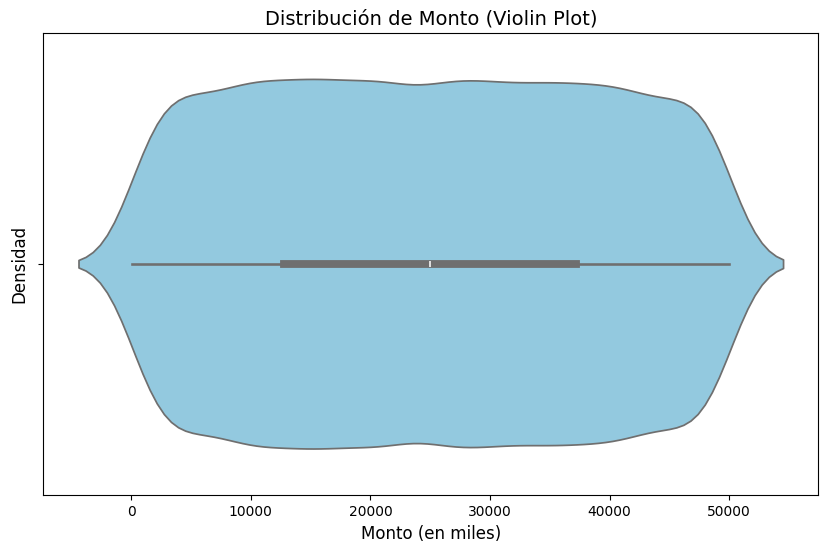

In [ ]:
# --- Gráficos con Seaborn ---

# 1. Gráfico univariado: Violin plot de la distribución de Monto
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Monto'], color='skyblue')
plt.title('Distribución de Monto (Violin Plot)', fontsize=14)
plt.xlabel('Monto (en miles)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.show()


En el primero grafico con seaborn decidi hacer un violin plot mostrando de frecuencia de los montos y una vez mas se muestra que la dispersion de los montos es muy dispersa.

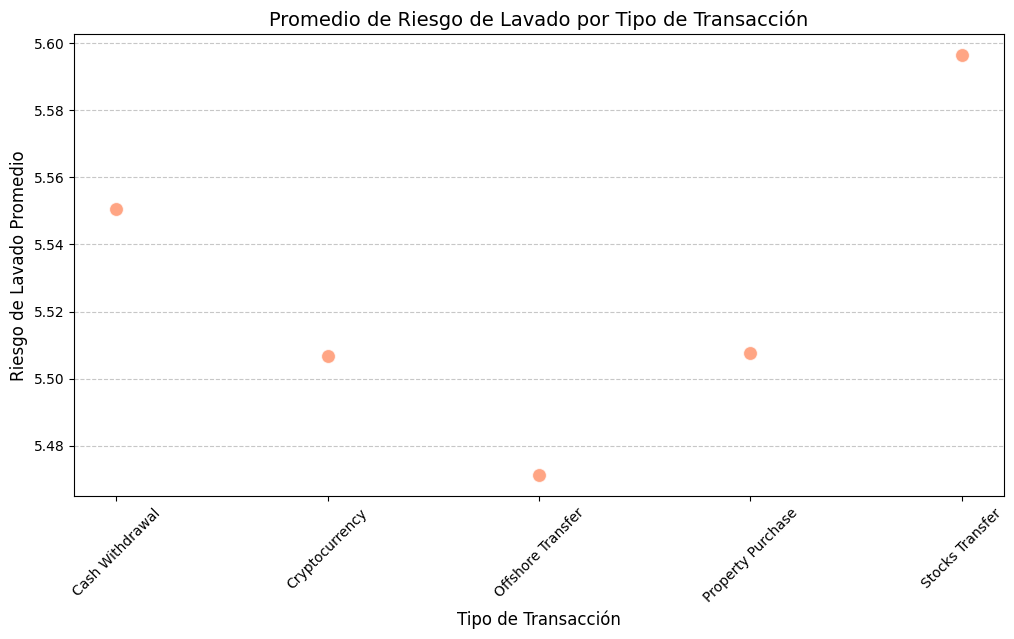

In [ ]:
# 2. Gráfico bivariado: Scatter plot del promedio de Riesgo de Lavado por Tipo de Transacción
# Calcular el promedio de riesgo de lavado por tipo de transacción
promedio_riesgo_tipo = data.groupby('Tipo de transaccion')['Riesgo de lavado'].mean().reset_index()
# Crear un scatter plot para mostrar el promedio del riesgo de lavado
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tipo de transaccion', y='Riesgo de lavado', data=promedio_riesgo_tipo, s=100, color='coral', alpha=0.7)
# Configuración del gráfico
plt.title('Promedio de Riesgo de Lavado por Tipo de Transacción', fontsize=14)
plt.xlabel('Tipo de Transacción', fontsize=12)
plt.ylabel('Riesgo de Lavado Promedio', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En esta segunda vizualizacion de seaborn, decidi mostrar que promedio de riesgo de lavado tiene por tipo de transaccion.

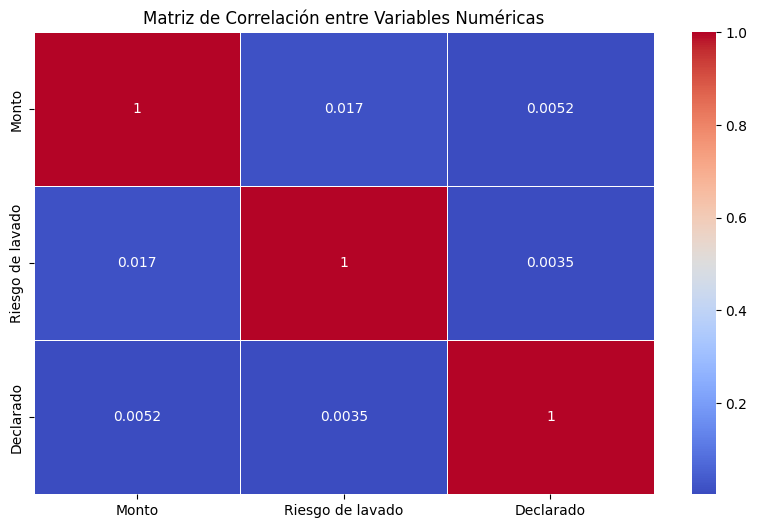

In [ ]:
# 3. Matriz de correlación entre variables numéricas
# Convertir variables booleanas a enteros para la matriz de correlación
data['Declarado'] = data['Declarado'].astype(int)
# Calcular la matriz de correlación entre variables numéricas
correlation_matrix = data[['Monto', 'Riesgo de lavado', 'Declarado']].corr()
# Visualización de la matriz de correlación usando heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

En este grafico final con seaborn muestro la correlacion entra las variables monto, riesgo de lavado y declarado. se puede ver que el valor de correlacion entre las mismas es muy bajo.

Como conclusion de este analisis podemos decir que el monto de las transacciones no tiene relacion con el valor de riesgo de lavado del mismo.
Podemos decir que el valor de riesgo de lavado no depende del monto de las transaccion, al menos de manera directa. Al realizar el analisis vimos tambien otras variables como tipo de transaccion, industria o pais de origen o destino y tampoco vimos una relacion directa con estas variables.
Por lo que podemos decir que el puntaje de riesgo de lavado debe ser multicausal y una combinacion de todas las variables.   

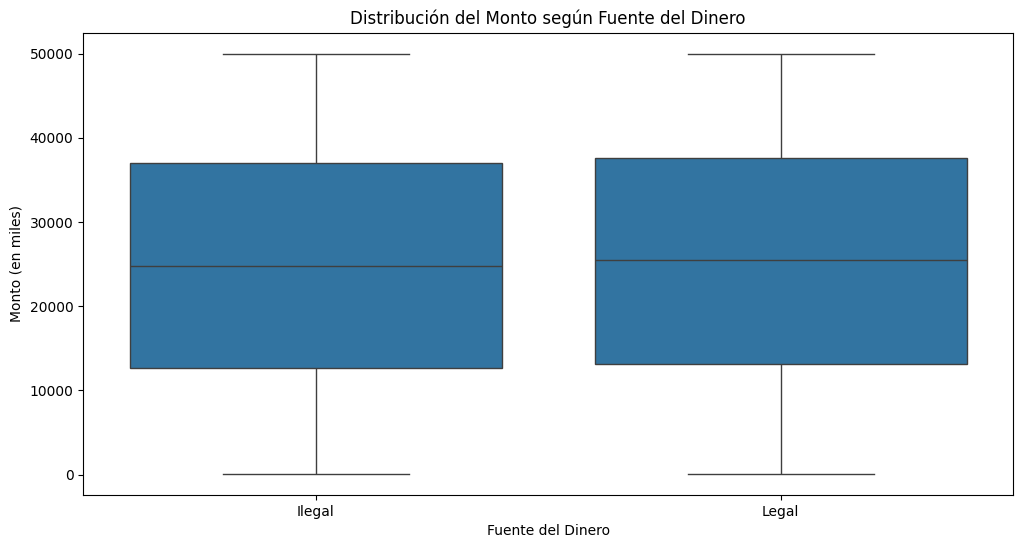

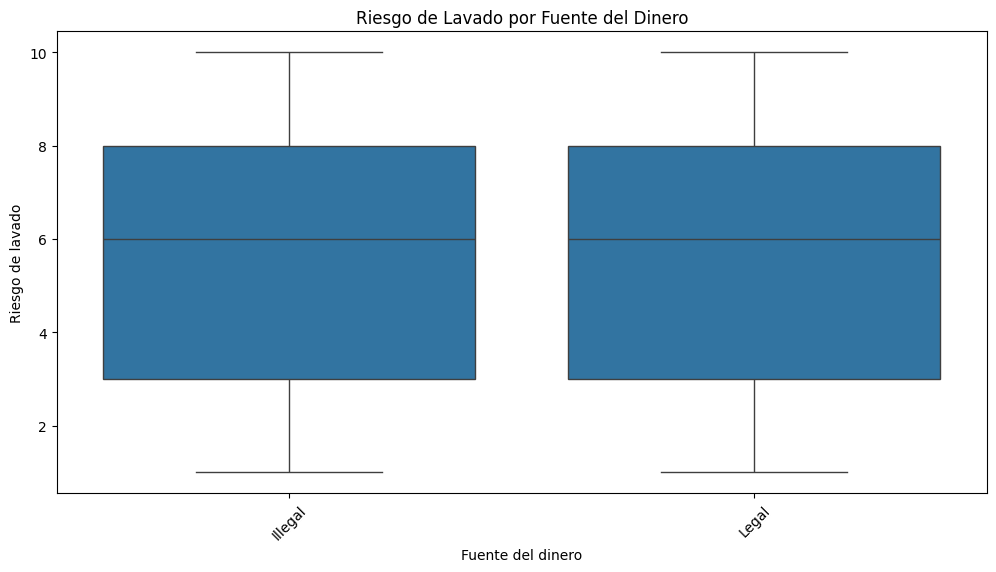

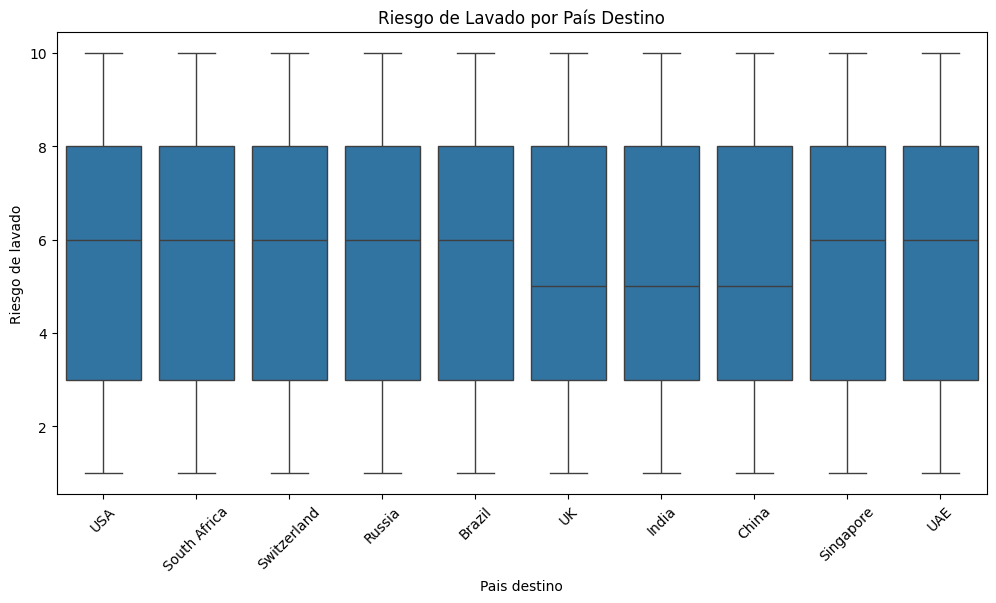

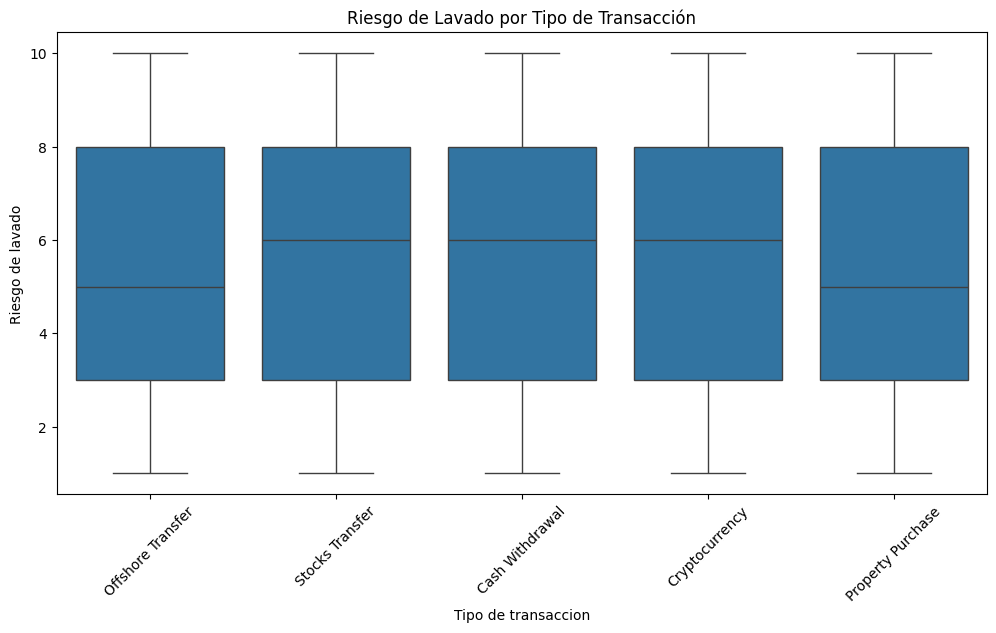

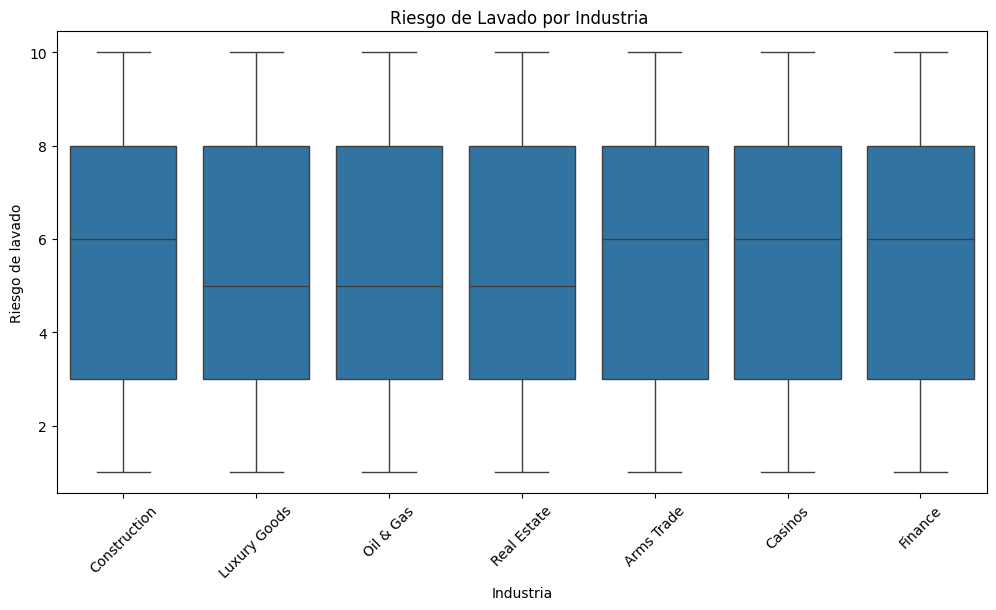

In [ ]:
# --- Analisis Adicional de otras variables ---
# ---  Boxplots para análisis categórico ---
# Boxplot para 'Monto' según 'Fuente del dinero'
plt.figure(figsize=(12, 6))
sns.boxplot(x="Fuente del dinero", y="Monto", data=data)
plt.xticks(ticks=[0, 1], labels=["Ilegal", "Legal"])
plt.title('Distribución del Monto según Fuente del Dinero')
plt.xlabel('Fuente del Dinero')
plt.ylabel('Monto (en miles)')
plt.show()

# Boxplot del Riesgo de Lavado por Fuente del Dinero
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuente del dinero', y='Riesgo de lavado', data=data)
plt.xticks(rotation=45)
plt.title('Riesgo de Lavado por Fuente del Dinero')
plt.show()

# Boxplot del Riesgo de Lavado por País Destino
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pais destino', y='Riesgo de lavado', data=data)
plt.xticks(rotation=45)
plt.title('Riesgo de Lavado por País Destino')
plt.show()

# Boxplot del Riesgo de Lavado por Tipo de Transacción
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo de transaccion', y='Riesgo de lavado', data=data)
plt.xticks(rotation=45)
plt.title('Riesgo de Lavado por Tipo de Transacción')
plt.show()

# Boxplot del Riesgo de Lavado por Industria
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industria', y='Riesgo de lavado', data=data)
plt.xticks(rotation=45)
plt.title('Riesgo de Lavado por Industria ')
plt.show()
